In [ ]:
import pandas as pd 

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data (1).csv


AttributeError: ignored

In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
data.isnull()

,Sentence,Sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5837,False,False
5838,False,False
5839,False,False
5840,False,False


In [ ]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
# converting and overwriting values in column
data["Sentence"]= data["Sentence"].str.lower()
  
# display
data

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


In [ ]:
import spacy
import nltk
# Initialize spacy ‘en’ model, keeping only component needed for lemmatization and creating an engine:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: ignored

In [ ]:
!pip install NLP-python
import NLP as nlp
#from NLP import NLP
#nlp = NLP()
# instantiate one


# ... then do stuff with it

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
#tokenization and remove punctuations
words = [str(token) for token in nlp(data) if not token.is_punct] 
#remove digits and other symbols except "@"--used to remove email
words = [re.sub(r"[^A-Za-z@]", "", word) for word in words]
#remove websites and email address
words = [re.sub(r"\S+com", "", word) for word in words]
words = [re.sub(r"\S+@\S+", "", word) for word in words]
#remove empty spaces 
words = [word for word in words if word!='']

TypeError: ignored

In [ ]:
import nltk

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [ ]:
import os
import nltk.corpus

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
x=data
z=word_tokenize(x)
y=sent_tokenize(x)
print(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: ignored

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyzer = SentimentIntensityAnalyzer()

In [ ]:
data['Score'] = data['Sentence'].apply(lambda review : sentanalyzer.polarity_scores(review))
data

,Sentence,Sentiment,Score
0,the geosolutions technology will leverage bene...,positive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp..."
2,"for the last quarter of 2010 , componenta 's n...",positive,"{'neg': 0.064, 'neu': 0.856, 'pos': 0.08, 'com..."
3,according to the finnish-russian chamber of co...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,the swedish buyout firm has sold its remaining...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...
5837,rising costs have forced packaging producer hu...,negative,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp..."
5838,nordic walking was first used as a summer trai...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5839,"according shipping company viking line , the e...",neutral,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
5840,"in the building and home improvement trade , s...",neutral,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp..."


In [ ]:
data["compound"] = data['Score'].apply(lambda f:f["compound"])
data

,Sentence,Sentiment,Score,compound
0,the geosolutions technology will leverage bene...,positive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.5423
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2023
2,"for the last quarter of 2010 , componenta 's n...",positive,"{'neg': 0.064, 'neu': 0.856, 'pos': 0.08, 'com...",0.1531
3,according to the finnish-russian chamber of co...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,the swedish buyout firm has sold its remaining...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...
5837,rising costs have forced packaging producer hu...,negative,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...",-0.5267
5838,nordic walking was first used as a summer trai...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5839,"according shipping company viking line , the e...",neutral,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.2023
5840,"in the building and home improvement trade , s...",neutral,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4588


In [ ]:
data['compound_rating']= data['compound'].apply(lambda score : "positive" if score >=0 else "negative")

In [ ]:
data['compound_rating'].value_counts()

positive    5052
negative     790
Name: compound_rating, dtype: int64

In [ ]:
data = data[['Sentence','Sentiment']]
data

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


In [ ]:
data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [ ]:
data = data[['Sentence','Sentiment']]
data

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


In [ ]:
df_neutral = data[ data['Sentiment'] == "neutral" ] # Step 1
df = data.drop(df_neutral.index, axis=0) # Step 2

In [ ]:
data=df
data

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
5,$spy wouldn't be surprised to see a green close,positive
6,shell's $70 billion bg deal meets shareholder ...,negative
...,...,...
5832,operating profit fell to eur 38.1 mn from eur ...,negative
5835,hsbc says unit to book $585 million charge on ...,negative
5836,daily mail parent company in talks with potent...,positive
5837,rising costs have forced packaging producer hu...,negative


In [ ]:
x = data['Sentence']
y = data['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
textclf = Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])

In [ ]:
textclf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay 

In [ ]:
preds = textclf.predict(x_test)

In [ ]:
print(accuracy_score(y_test,preds))

0.8230958230958231


In [ ]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[153 110]
 [ 34 517]]


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=[False,True])

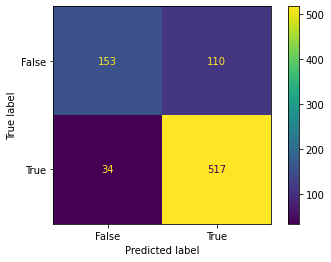

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
newreview = [("The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .")]

In [ ]:
textclf.predict(newreview)

array(['positive'], dtype=object)

In [ ]:
textclf.predict(newreview)[0]

'positive'